# 로지스틱 회귀 (LogisticRegression)
- linear regression algorithm을 이용한 binary classification model이다.
- model 이름에 regression은 있지만 regression이 아닌 classification model이다.
- Sample이 특정 클래스에 속할 확률을 추정한다.

## 확률 추정
- logistic function을 이용한다.
- 선형회귀 처럼 입력 특성(Feature)에 가중치 합을 계산한 값을 로지스틱 함수를 적용해 확률을 계산한다.
- linear regression으로 찾은 식을 logistic function에 넣으면 positive일 확률이 출력된다.

$$
\hat{p} = \sigma \left( \mathbf{w}^{T} \cdot \mathbf{X} + \mathbf{b} \right)\\
\hat{p}:\: positive일\,확률,\quad \sigma():\:logistic\,함수,\quad \mathbf{w}:\:weight,\quad \mathbf{X}:\:input feature,\quad \mathbf{b}:\:bias
$$

- LogisticRegression은 binary classificatino이므로 y를 0 또는 1로 예측한다.
    - positive일 확률이 0.5보다 작으면 y의 label을 0으로 예측한다.
    - positive일 확률이 0.5이상이면 y의 label을 1로 예측한다.

### Logistic Function
- 0과 1사이의 실수를 반환한다.
- S 자 형태의 결과를 내는 **시그모이드 함수(sigmoid function)** 이다.

$$
\sigma(x) = \frac{1}{1 + \mathbf{e}^{-x}}
$$

- 절대 0과 1은 되지 않는다. 다만 0과 1에 수렴할 뿐이다.

##### logistic function의 visualization

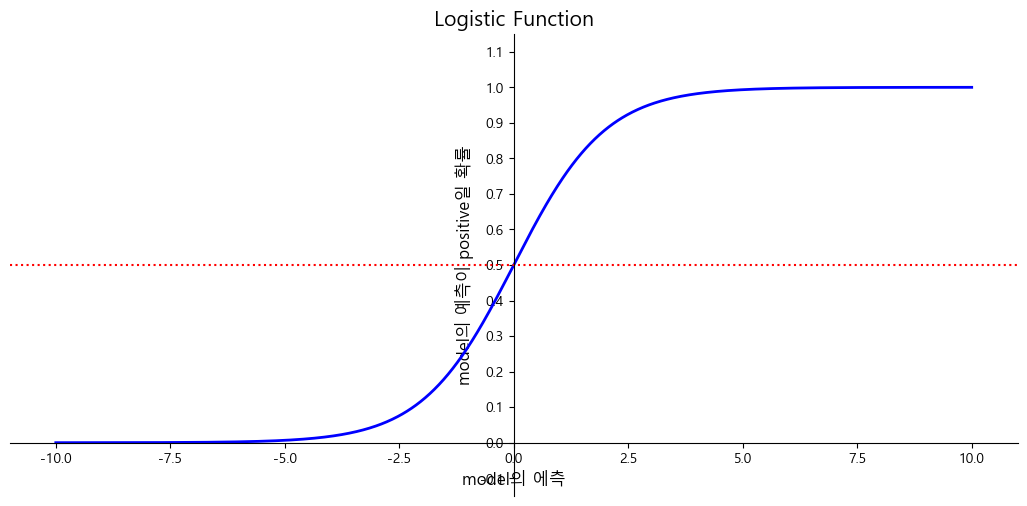

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def logistic_func(X):
    return 1 / (1 + np.exp(-X))  

X = np.linspace(-10, 10, 1000) 
y = logistic_func(X)

plt.figure(figsize=(13, 6))

plt.plot(X, y, color='b', linewidth=2)

plt.axhline(y=0.5, color='r', linestyle=':')

plt.ylim(-0.15, 1.15)
plt.yticks(np.arange(-0.1,1.2,0.1))

# 축 설정
ax = plt.gca()
ax.spines['left'].set_position("center")
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Logistic Function', fontsize = 15)
plt.xlabel('model의 에측', fontsize = 12)
plt.ylabel('model의 예측이 positive일 확률', fontsize = 12)
plt.show()

In [3]:
np.min(y), np.max(y)

(4.5397868702434395e-05, 0.9999546021312976)

## LogisticRegression의 Loss Function
- **Cross Entropy(로그손실-log loss)**
    - 모델이 예측한 정답의 확률에 대해 log를 취해 손실값을 구한다.
        - 확률이 틀리면 틀릴 수록 손실값을 크게 만들기 위해서 log를 취한다.
        - log함수는 입력 값이 0에 가까워 질수록 음의 무한대로 발산한다. 정답일 확률은 0 ~ 1까지의 값을 가지는데 이것에 log를 취하면 음의 무한대 ~ 0이 된다. 그래서 positive일 확률이 1 즉 완벽하게 positive라면 loss는 0이 된다. 반대로 positiv일 확률이 낮아지면 loss는 계속해서 커진다.

$$
\log{\left(모델이\,예측한\,정답에\,대한\,확률\right)}
$$

- **Binary Cross Entropy**
    - binary classification일 때 사용한다.
    - Logistic 함수를 이용한 추론 결과에 대한 cross entropy 계산
        - Logistic함수은 positive(1)의 확률만 추출하므로 정답이 0일때, 1일때 계산하는 것이 다르다. 그것을 하나의 공식으로 정의한 것이 binary cross entropy이다.

- 괄호 안의 식 설명
    - 첫 번째 항: 실제 값 * 예측이 positive일 확률의 log loss
    - 두 번째 항: (1 - 실제 값) * (1 - 예측이 positive일 확률의 log loss(= 예측이 negative일 확률의 log loss))

$$
L(\mathbf{W}) = - \frac{1}{m} \sum_{i=1}^{m}{\left[ y_{i} \log{\left( \hat{p}_i \right)} + \left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)} \right]}\\
y:\:실제값(정답),\quad\hat{p}:\:예측확률(양성확률)
$$

- y(실제값) 이 1인 경우 $y_{i}\log{\left(\hat{p}_i\right)}$ 이 손실을 계산
- y가 0인 경우 $\left( 1 - y_i \right) \log{\left( 1 - \hat{p}_i \right)}$이 손실을 계산
- $\hat{p}$(예측확률)이 클수록 반환값은 작아지고 작을 수록 값이 커진다. 

- 실제 값은 0과 1밖에 없다. 즉 위 식은 양성일 때는???

> - **Loss Function**
>   - 모델이 예측한 값과 정답간의 차이(오차, loss)를 구하는 함수.
>   - 모델의 파라미터를 최적화할 때 loss를 최소화하는 것을 목적으로 한다.
> 

In [ ]:
# log loss function의 개형을 확인해보자. 
# log 함수에 음수를 취한다.

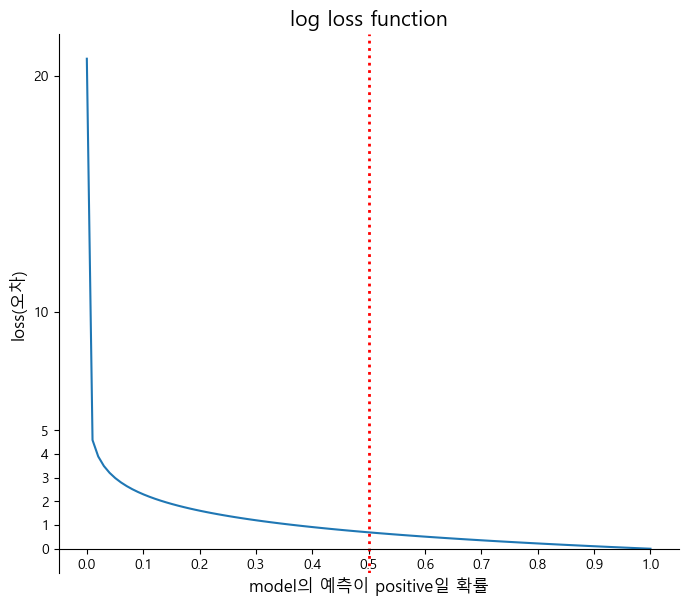

In [15]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0.000000001, 1, 100)   # 정답의 확률(X값)
y = -np.log(X)                         # 오차(log loss)

plt.figure(figsize=(8,7))
plt.plot(X, y)
plt.axvline(0.5, linestyle=':', linewidth=2, color='r')

plt.xticks(np.arange(0,1.1,0.1))
plt.yticks([0,1,2,3,4,5,10,20])
plt.gca().spines['bottom'].set_position(("data", 0))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('log loss function', fontsize = 15)
plt.xlabel('model의 예측이 positive일 확률', fontsize = 12)
plt.ylabel('loss(오차)', fontsize = 12)
plt.show()

In [ ]:
# 위와 같이 positive일 확률이 작아지면 작아질수록 loss가 커진다. 즉 model의 에측이 

In [ ]:
# log loss function을 사용하면 많이 틀렸을 때 오차를 무한대로 키울 수 있다.
# 이것이 log loss function을 사용하는 이유이다. MSE는 오차가 아무리 커도 1이 최대이다.

## 최적화 

### 최적화란
- 모델이 예측한 결과와 정답간의 차이(오차)를 가장 적게 만드는 Parameter를 찾는 과정을 최적화라고 한다.
- 모델의 예측값과 실제 값의 차이를 계산하는 함수를 만들고 그 값이 최소가 되는 지점을 찾는 작업을 한다.

### 목적함수(Object Function), 손실함수(Loss Function), 비용함수(Cost Function), 오차함수(Error Function)
- 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.
- 이 함수의 반환값(Loss)을 최소화 하는 파라미터을 찾는 것이 최적화의 목적
- 해결하려는 문제에 맞춰 Loss 함수를 정의한다.
    - Classification(분류)의 경우 cross entropy(log loss)를 사용한다.
    - Regression(회귀)의 경우 MSE(Mean Squared Error)를 사용한다.

### LogisticRegression의 최적화
- 분류 문제이므로 Cross entropy(Log loss함수)를 손실함수로 사용한다.
- Cross entropy는 loss의 최소값으로 하는 parameter 찾는 방정식이 없기 때문에 **LogisticRegression은 경사하강법을 이용해 최적화를 진행한다.**
- 로그 손실을 $\mathbf{W}$로 미분하면 다음과 같다.
    - 아래 도함수로 기울기를 구해 기울기가 0이 될 때 까지 W(가중치)들을 update한다.
$$
\frac{\partial}{\partial w_j}L(W) = \frac{1}{m} \sum_{i=1}^{m}{\left( \sigma \left( \mathbf{W}^{T} \cdot \mathbf{x}_i \right) - \mathbf{y}_i \right)} x_{ij}
$$

- gradient descent를 사용해 위 식을 w에서 뺀다. 그러면 w_new가 나온다. 이 과정을 계속해서 반복한다.
- 위 식이 0이 될 때까지 반복

## LogisticRegression 주요 하이퍼파라미터
- penalty: overfitting을 줄이기 위한 규제방식
    - 'l1', 'l2'(기본값), 'elasticnet', 'none'(LinearRegression과 같아진다.)
- C: 규제 강도를 설정한다.(기본값 1)
    - 작을수록 규제가 강해져 model을 단순화한다. 커지면 규제가 약해져 model을 복잡하게 만든다.
    - overfitting이 발생했을 때: C를 작게 만든다.
    - underfitting이 발생했을 때: C를 크게 만든다.
- max_iter(기본값 100) : gradient descent를 실행하는 최대 반복 횟수를 설정한다.

## 예제

In [17]:
# 필요한 것 import

In [35]:
import numpy as np
import pandas as pd

# data 관련
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# data preprocessing 관련
from sklearn.preprocessing import StandardScaler

# model 관련
from sklearn.linear_model import LogisticRegression

# Grid Search 관련
from sklearn.model_selection import GridSearchCV

# eavluation index 관련
from metrics import print_metrics_classification as pmc, print_metrics_classification_AP_ROC as pmc_A_R

In [20]:
# data 생성
data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

##### 데이터 전처리
- LogisticRegression은 선형회귀 기반의 알고리즘이므로 연속형 Feature는 Feature scaling, 범주형 Feature는 One hot encoding 처리를 한다.

In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 모델 생성, 학습, 추론, 평가

In [23]:
# model 생성
lr = LogisticRegression(random_state = 0)

# model 학습
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [24]:
lr.coef_

array([[-0.54384088, -0.34034271, -0.49560632, -0.56663005, -0.05559393,
         0.3999005 , -0.80734348, -1.10605291,  0.02920742,  0.40610307,
        -1.21922963, -0.13909852, -0.51970089, -0.76005919, -0.21510325,
         0.69981736,  0.02923076, -0.35243416,  0.47310794,  0.55701021,
        -0.99402288, -1.10967269, -0.77768019, -0.87390453, -0.46969384,
        -0.13650097, -0.68987558, -0.91744655, -0.70517455, -0.74475703]])

In [25]:
lr.intercept_

array([0.33121447])

In [26]:
# model의 예측 결과 생성
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

In [28]:
# model 평가
pmc(y_train, pred_train, title = 'train data set에 대한 model의 성능')
print('=' * 50)
pmc(y_test, pred_test, title = 'test data set에 대한 model의 성능')

train data set에 대한 model의 성능
Accuracy: 0.991
Recall: 0.996
Precision: 0.989
F1-score: 0.993
test data set에 대한 model의 성능
Accuracy: 0.958
Recall: 0.967
Precision: 0.967
F1-score: 0.967


In [30]:
proba_train = lr.predict_proba(X_train_scaled)
proba_test = lr.predict_proba(X_test_scaled)

In [31]:
# positive일 확률만 추출해 함수에 넣는다.
pmc_A_R(y_train, proba_train[:, 1], title = 'train data set에 대한 model의 성능')
print('=' * 50)
pmc_A_R(y_test, proba_test[:, 1], title = 'test data set에 대한 model의 성능')


train data set에 대한 model의 성능
AP Score: 0.999
ROC-AUC Score: 0.998
test data set에 대한 model의 성능
AP Score: 0.997
ROC-AUC Score: 0.995


##### GridSearchCV를 이용해 하이퍼파라미터 탐색
- C

In [39]:
params = {
    'penalty': ['l1', 'l2'], 
    'C': [0.01, 0.1, 1, 10, 100]
}

gs = GridSearchCV(estimator = LogisticRegression(random_state = 0, solver = 'liblinear'), 
                  param_grid = params, 
                  scoring = ['accuracy', 'recall', 'precision'], 
                  refit = 'recall', 
                  cv = 4,
                  n_jobs = -1)

gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=4,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             refit='recall', scoring=['accuracy', 'recall', 'precision'])

In [40]:
gs.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [41]:
gs.best_score_

0.9925373134328358

In [42]:
result = pd.DataFrame(gs.cv_results_)
result.sort_values('rank_test_recall').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,mean_test_recall,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,mean_test_precision,std_test_precision,rank_test_precision
3,0.002078,0.000334,0.002849,0.000269,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.953271,0.971963,1.000000,...,0.992537,0.007463,1,0.942857,0.970588,1.000000,1.000000,0.978361,0.023756,1
5,0.002986,0.000350,0.004001,0.000701,1,l2,"{'C': 1, 'penalty': 'l2'}",0.953271,0.971963,0.990566,...,0.992537,0.007463,1,0.942857,0.970588,0.985294,0.970588,0.967332,0.015353,4
4,0.002500,0.000500,0.003572,0.000429,1,l1,"{'C': 1, 'penalty': 'l1'}",0.943925,0.962617,0.981132,...,0.985075,0.010554,3,0.929577,0.970149,0.985075,0.970588,0.963847,0.020677,5
7,0.002952,0.000680,0.004917,0.001402,10,l2,"{'C': 10, 'penalty': 'l2'}",0.925234,0.971963,0.981132,...,0.981343,0.024468,4,0.940299,0.970588,0.971014,0.970588,0.963122,0.013179,6
1,0.001588,0.000430,0.002755,0.000436,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.925234,0.971963,0.990566,...,0.981287,0.006431,5,0.915493,0.970588,1.000000,0.984848,0.967732,0.031903,3
